# Pandas version of the code in "R for Marketing Research and Analytics"

## Ch 3 - Simulating data and plotting

### Jupyter template stuff

In [153]:
from IPython.core.interactiveshell import InteractiveShell

# pretty print only the last output of the cell
#InteractiveShell.ast_node_interactivity = "last_expr"
# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"

In [154]:
from IPython.display import Markdown, display
def printmd(string, color=None):
    if color:
        colorstr = "<span style='color:{}'>{}</span>".format(color, string)
        display(Markdown(colorstr))
    else:
        display(Markdown(string))

#printmd("## title text")
#printmd("**bold text**")
#printmd("**bold and blue**", color="blue")

In [155]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import seaborn as sb

print(plt.style.available)
plt.style.use('seaborn')

plt.rcParams['figure.figsize'] = 8, 4

['Solarize_Light2', '_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'tableau-colorblind10']


### Simulate Data

In [156]:
#define constants
k_stores = 20  # 20 stores, using "k_" for "constant"
k_years = 2
k_weeks_per_year = 52   

In [157]:
# create data frame of initially missing values to hold the data
columns=['storeNum', 'Year', 'Week', 'p1sales', 'p2sales', 'p1price','p2price','p1prom','p2prom','country']
df_store = pd.DataFrame(data=np.empty(shape=(k_stores*k_weeks_per_year*k_years, len(columns))),
                        columns=columns)
df_store.tail(5)

,storeNum,Year,Week,p1sales,p2sales,p1price,p2price,p1prom,p2prom,country
2075,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310
2076,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310
2077,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310
2078,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310
2079,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310


In [158]:
df_store.shape

(2080, 10)

### Repeating values and sequences
When simulating data, we often need to repeat values in category ("factor") columns.  This section goes through some basic python and pandas for repeating elements or sequences to do this.

In [159]:
##### Sequences ######
printmd('**Sequences** _repeated_:  Option1: python lists * x', color='blue')
# Use python list multiplication to repeat sequences
seq = ['a', 'b', 'c']
print(seq * 6)

printmd('Sequences repeated:  Option2: np.tile() on panda Series', color='blue')
# OR use np.tile to repeat sequences
np.tile(pd.Series(['a','b','c']), 6)

printmd('using * for Series ends up broadcasting math if used with Series of numbers', color='blue')
# works for integers too if a python list.  pd.Series wouldn't work here
# because the "*6" would be interpreted as an integer math with a vector
# and it would "broadcast" the 1-dimensional number 6 and multiply it by
# all the integers in the Series
seq = [1, 2, 3]
#print(seq * 6) # works with python list
print(pd.Series(seq) * 6) # doesn't work (does math instead) on panda Series

printmd('...but np.tile works for panda Series with numbers', color='blue')
# in the case of needing to repeat sequences of panda integer Series, use np.tile:
np.tile(pd.Series(seq), 6)


##### Repeating Values ######
printmd('**Individual values** _repeated_:  Option1: use np.repeat() or Series.repeat()', color='red')
# The numpy repeat() repeats the individual values it finds in the array
np.repeat(seq,6)  # pd.Series(seq).repeat(6) #also works
pd.Series(seq).repeat(6)


<span style='color:blue'>**Sequences** _repeated_:  Option1: python lists * x</span>

['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c']


<span style='color:blue'>Sequences repeated:  Option2: np.tile() on panda Series</span>

array(['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c', 'a',
       'b', 'c', 'a', 'b', 'c'], dtype=object)

<span style='color:blue'>using * for Series ends up broadcasting math if used with Series of numbers</span>

0     6
1    12
2    18
dtype: int64


<span style='color:blue'>...but np.tile works for panda Series with numbers</span>

array([1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3])

<span style='color:red'>**Individual values** _repeated_:  Option1: use np.repeat() or Series.repeat()</span>

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3])

0    1
0    1
0    1
0    1
0    1
0    1
1    2
1    2
1    2
1    2
1    2
1    2
2    3
2    3
2    3
2    3
2    3
2    3
dtype: int64

### Add categorical columns
Create 2 series that will represent the store number and country for each observation

In [160]:
store_num = [num for num in range(101,100+k_stores+1)] 
print(store_num)
store_cty = ["US"]*3 + ["DE"]*5 + ["GB"]*3 + ["BR"]*2 + ["JP"]*4 + ["AU"]*1 + ["CN"]*2
print(store_cty)
len(store_cty)  # make sure this is the right length

[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
['US', 'US', 'US', 'DE', 'DE', 'DE', 'DE', 'DE', 'GB', 'GB', 'GB', 'BR', 'BR', 'JP', 'JP', 'JP', 'JP', 'AU', 'CN', 'CN']


20

In [161]:
# now replace the appropriate column in the dataframe with those values
# and repeat the sequences so it is the right number of rows
df_store.storeNum = store_num * k_weeks_per_year * k_years
df_store.country = store_cty * k_weeks_per_year * k_years
#df_store.tail(21)

In [162]:
# Now do the same for Week and Year columns
df_store.Week = [week for week in range(1,k_weeks_per_year+1)] * k_stores*2
# for year, we want each store to have 
one_store_worth_of_year_entries = [[year]*k_weeks_per_year for year in range(1,k_years+1)]
# now flattend this list of lists:
flat_list = [item for sublist in one_store_worth_of_year_entries for item in sublist]
print(flat_list)
df_store.Year = flat_list * k_stores
df_store.tail(21)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


,storeNum,Year,Week,p1sales,p2sales,p1price,p2price,p1prom,p2prom,country
2059,120,2,32,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,CN
2060,101,2,33,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,US
2061,102,2,34,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,US
2062,103,2,35,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,US
2063,104,2,36,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,DE
2064,105,2,37,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,DE
2065,106,2,38,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,DE
2066,107,2,39,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,DE
2067,108,2,40,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,DE
2068,109,2,41,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,6.626473e-310,GB


### Check the structure

In [82]:
# Check the overall structure
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 10 columns):
storeNum    2080 non-null int64
Year        2080 non-null int64
Week        2080 non-null int64
p1sales     2030 non-null float64
p2sales     1926 non-null float64
p1price     2028 non-null float64
p2price     1927 non-null float64
p1prom      2029 non-null float64
p2prom      1926 non-null float64
country     2080 non-null object
dtypes: float64(6), int64(3), object(1)
memory usage: 162.6+ KB


### Set category variables (called "factors" in R)

In [83]:
# Category Primer
s = pd.Series(pd.Categorical(['grade a', 'd paper', 'd paper', 'grade a', 'grade a', 'b paper']))
s
s.cat.categories
# rename the categories
s.cat.categories = ['good', 'bad', 'very good'] #must correspond to order of existing s.cat.categories
s
# rename/reorder the categories and add missing categories
s = s.cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])
s
# converting a string (object) Series to a categorical
s = pd.Series(['a','b','a','d']).astype('category')
s


0    grade a
1    d paper
2    d paper
3    grade a
4    grade a
5    b paper
dtype: category
Categories (3, object): [b paper, d paper, grade a]

Index(['b paper', 'd paper', 'grade a'], dtype='object')

0    very good
1          bad
2          bad
3    very good
4    very good
5         good
dtype: category
Categories (3, object): [good, bad, very good]

0    very good
1          bad
2          bad
3    very good
4    very good
5         good
dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

0    a
1    b
2    a
3    d
dtype: category
Categories (3, object): [a, b, d]

In [84]:
# set country as a categorical variable
df_store.country = df_store.country.astype('category')
# set storeeNum as categorical variable
df_store.storeNum = df_store.storeNum.astype('category')

### Simulating data points

In [85]:
# specify the seed to make test results repeatable
np.random.seed(98250)
# randomly select weeks that products p1 and p2 were promoted. The vars specify how often they are promoted
p1_promo_rate = 0.1
p2_promo_rate = 0.15
df_store.p1prom = np.random.binomial(n=1, p=p1_promo_rate, size=df_store.p1prom.shape[0]) # 1 10% of the time, 0 otherwise; repeat num_row times
df_store.p2prom = np.random.binomial(n=1, p=p2_promo_rate, size=df_store.p2prom.shape[0])
df_store.sample(20)

,storeNum,Year,Week,p1sales,p2sales,p1price,p2price,p1prom,p2prom,country
1427,108,2,24,0.000000e+00,4.802318e-321,1.000000e+00,4.812199e-321,0,0,DE
831,112,2,52,6.190643e-321,7.291119e-304,6.200524e-321,7.291119e-304,0,0,BR
1584,105,1,25,2.435744e-321,0.000000e+00,2.445625e-321,1.000000e+00,0,0,DE
1999,120,1,24,2.692658e-321,2.470328e-321,2.702539e-321,2.480210e-321,0,1,CN
1043,104,1,4,1.400000e+02,1.400000e+02,1.410000e+02,1.400000e+02,0,0,DE
216,117,1,9,7.291119e-304,6.175821e-321,7.291119e-304,6.185702e-321,0,0,JP
2017,118,1,42,3.581976e-321,3.448578e-321,3.591857e-321,3.468341e-321,0,0,AU
507,108,2,40,7.291119e-304,3.063207e-322,7.291119e-304,3.162020e-322,0,0,DE
1670,111,1,7,6.684708e-321,1.000000e+00,6.694590e-321,0.000000e+00,0,0,GB
840,101,1,9,6.635302e-321,NaN,6.645183e-321,NaN,0,0,US


In [86]:
# randomly select one of five prices by sampling with replacement
p1_possible_prices = [2.19, 2.29, 2.49, 2.79, 2.99]
p2_possible_prices = [2.29, 2.49, 2.59, 2.99, 3.19]
df_store.p1price = np.random.choice(p1_possible_prices, size=df_store.p1price.shape[0], replace=True)
df_store.p2price = np.random.choice(p2_possible_prices, size=df_store.p2price.shape[0], replace=True)
df_store.sample(20)

,storeNum,Year,Week,p1sales,p2sales,p1price,p2price,p1prom,p2prom,country
789,110,2,10,4.115567e-321,7.291119e-304,2.29,2.49,1,0,GB
1550,111,2,43,7.559204e-322,0.000000e+00,2.19,2.49,0,1,GB
1709,110,1,46,8.611564e-321,1.000000e+00,2.99,2.49,0,1,GB
1023,104,2,36,1.320000e+02,1.340000e+02,2.79,2.59,0,0,DE
591,112,2,20,7.291119e-304,4.456472e-321,2.19,2.29,0,0,BR
795,116,2,16,4.412006e-321,NaN,2.29,2.59,0,0,JP
1474,115,1,19,0.000000e+00,7.124427e-321,2.99,2.99,0,0,JP
252,113,1,45,7.291119e-304,7.954457e-321,2.99,2.29,0,0,BR
1382,103,1,31,0.000000e+00,2.579023e-321,2.99,2.49,0,1,US
195,116,2,40,7.291119e-304,5.138283e-321,2.79,2.49,0,0,JP


In [87]:
# Randomly generate sales (unit sales) data.  Use Poisson with lambda=mean weekly sales
p1_mean_weekly_sales = 120
p2_mean_weekly_sales = 100
# first randomly generate sales
tmp_p1sales = np.random.poisson(lam=p1_mean_weekly_sales, size=df_store.p1price.shape[0])
tmp_p2sales = np.random.poisson(lam=p1_mean_weekly_sales, size=df_store.p2price.shape[0])
df_store.head(10)
print(tmp_p1sales[:10])
print(tmp_p2sales[:10])
# now scale these counts up or down according to relative price.  Price effects often
# follow a logarithmic function rather than a linear function, so we use log(price)
# we assume that sales vary as the inverse ratio of the two prices
tmp_p1sales = tmp_p1sales * np.log(df_store.p2price) / np.log(df_store.p1price)
tmp_p2sales = tmp_p2sales * np.log(df_store.p1price) / np.log(df_store.p2price)
print(tmp_p1sales[:10])
print(tmp_p2sales[:10])
# now assume sales get a 30% or 40% lift when each product is promoted
p1_promo_uplift = 0.3
p2_promo_uplift = 0.4
df_store.p1sales = np.floor(tmp_p1sales * (1 + df_store.p1prom*p1_promo_uplift))
df_store.p2sales = np.floor(tmp_p2sales * (1 + df_store.p2prom*p2_promo_uplift))
df_store.sample(20)

,storeNum,Year,Week,p1sales,p2sales,p1price,p2price,p1prom,p2prom,country
0,101,1,1,0.000000e+00,0.000000e+00,2.29,3.19,0,0,US
1,102,1,2,1.482197e-323,6.366000e-314,2.49,3.19,1,1,US
2,103,1,3,4.244004e-314,0.000000e+00,2.79,3.19,0,0,US
3,104,1,4,0.000000e+00,0.000000e+00,2.19,2.49,0,0,DE
4,105,1,5,0.000000e+00,1.485398e-313,2.49,3.19,0,0,DE
5,106,1,6,1.697598e-313,0.000000e+00,2.79,3.19,0,0,DE
6,107,1,7,0.000000e+00,3.458460e-323,2.79,3.19,0,1,DE
7,108,1,8,0.000000e+00,4.244004e-314,2.29,2.59,1,0,DE
8,109,1,9,2.758596e-313,0.000000e+00,2.19,2.29,0,0,GB
9,110,1,10,0.000000e+00,0.000000e+00,2.99,2.49,0,1,GB


[149 127  96 142 108 116 118 116 106 113]
[134 118 111 108 113 109 142 126 106 100]
0    208.608699
1    161.487941
2    108.535569
3    165.255632
4    137.328328
5    131.147145
6    133.408303
7    133.235256
8    112.037657
9     94.120744
dtype: float64
0     95.710294
1     92.799499
2     98.179796
3     92.801678
4     88.867317
5     96.410791
6    125.599379
7    109.700694
8    100.287709
9    120.058549
dtype: float64


,storeNum,Year,Week,p1sales,p2sales,p1price,p2price,p1prom,p2prom,country
228,109,1,21,95.0,136.0,2.49,2.29,0,0,GB
1362,103,1,11,125.0,113.0,2.29,2.29,0,0,US
1698,119,1,35,128.0,100.0,2.19,2.49,0,0,CN
1730,111,2,15,171.0,100.0,2.19,2.99,0,0,GB
1924,105,2,1,133.0,105.0,2.19,2.29,0,0,DE
1319,120,2,20,92.0,125.0,2.79,2.49,0,0,CN
1152,113,1,9,119.0,103.0,2.49,2.59,0,0,BR
575,116,2,4,121.0,121.0,2.19,2.29,0,0,JP
1683,104,1,20,90.0,238.0,2.99,2.49,0,1,DE
1084,105,1,45,126.0,167.0,2.99,2.29,1,0,DE


### One command alternative for all of the above (!)

In [167]:
dates = pd.date_range('20130101', periods=k_weeks_per_year * k_years, freq='W')
#years_old = pd.date_range('2013', periods=k_years, freq='Y')
print(dates)
# specify the seed to make test results repeatable
np.random.seed(98250)
# randomly select weeks that products p1 and p2 were promoted. The vars specify how often they are promoted
p1_promo_rate = 0.1
p2_promo_rate = 0.15
# randomly select one of five prices by sampling with replacement
p1_possible_prices = [2.19, 2.29, 2.49, 2.79, 2.99]
p2_possible_prices = [2.29, 2.49, 2.59, 2.99, 3.19]
# Randomly generate sales (unit sales) data.  Use Poisson with lambda=mean weekly sales
p1_mean_weekly_sales = 120
p2_mean_weekly_sales = 100

df_onecommand = pd.DataFrame(data= {'storeNum': [num for num in range(101,100+k_stores+1)] * k_weeks_per_year * k_years,
                                    'country': (["US"]*3 + ["DE"]*5 + ["GB"]*3 + ["BR"]*2 + ["JP"]*4 + ["AU"]*1 + ["CN"]*2) * k_weeks_per_year * k_years,
#                                    'Date': np.tile(dates, k_stores),
#                                    'Year': np.tile(dates.year, k_stores),
#                                    'Week': np.tile(dates.week, k_stores),
                                    'Date': dates.repeat(k_stores),
                                    'Year': dates.year.repeat(k_stores),
                                    'Week': dates.week.repeat(k_stores),
                                    # these sales are just random -- we'll later tweak them to make sense given that week's pricing and promotion
                                    'p1sales': np.random.poisson(lam=p1_mean_weekly_sales, size=k_stores * k_weeks_per_year * k_years),
                                    'p2sales': np.random.poisson(lam=p1_mean_weekly_sales, size=k_stores * k_weeks_per_year * k_years),
                                    'p1price': np.random.choice(p1_possible_prices, size=k_stores * k_weeks_per_year * k_years, replace=True),
                                    'p2price': np.random.choice(p2_possible_prices, size=k_stores * k_weeks_per_year * k_years, replace=True),
                                    'p1prom': np.random.binomial(n=1, p=p1_promo_rate, size=k_stores * k_weeks_per_year * k_years), # 1 10% of the time, 0 otherwise; repeat num_row times
                                    'p2prom': np.random.binomial(n=1, p=p2_promo_rate, size=k_stores * k_weeks_per_year * k_years),
})

# now scale the sales counts up or down according to relative price.  Price effects often
# follow a logarithmic function rather than a linear function, so we use log(price)
# we assume that sales vary as the inverse ratio of the two prices
df_onecommand.p1sales = df_onecommand.p1sales * np.log(df_onecommand.p2price) / np.log(df_onecommand.p1price)
df_onecommand.p2sales = df_onecommand.p2sales * np.log(df_onecommand.p1price) / np.log(df_onecommand.p2price)
# now assume sales get a 30% or 40% lift when each product is promoted
p1_promo_uplift = 0.3
p2_promo_uplift = 0.4
df_onecommand.p1sales = np.floor(df_onecommand.p1sales * (1 + df_onecommand.p1prom*p1_promo_uplift))
df_onecommand.p2sales = np.floor(df_onecommand.p2sales * (1 + df_onecommand.p2prom*p2_promo_uplift))

# set country as a categorical variable
df_onecommand.country = df_onecommand.country.astype('category')
# set storeeNum as categorical variable
df_onecommand.storeNum = df_onecommand.storeNum.astype('category')

df_onecommand

DatetimeIndex(['2013-01-06', '2013-01-13', '2013-01-20', '2013-01-27',
               '2013-02-03', '2013-02-10', '2013-02-17', '2013-02-24',
               '2013-03-03', '2013-03-10',
               ...
               '2014-10-26', '2014-11-02', '2014-11-09', '2014-11-16',
               '2014-11-23', '2014-11-30', '2014-12-07', '2014-12-14',
               '2014-12-21', '2014-12-28'],
              dtype='datetime64[ns]', length=104, freq='W-SUN')


,storeNum,country,Date,Year,Week,p1sales,p2sales,p1price,p2price,p1prom,p2prom
0,101,US,2013-01-06,2013,1,125.0,107.0,2.49,2.59,0,0
1,102,US,2013-01-06,2013,1,92.0,146.0,2.99,2.59,0,0
2,103,US,2013-01-06,2013,1,160.0,77.0,2.19,2.99,0,0
3,104,DE,2013-01-06,2013,1,134.0,104.0,2.19,2.49,0,0
4,105,DE,2013-01-06,2013,1,92.0,146.0,2.79,2.29,0,0
5,106,DE,2013-01-06,2013,1,142.0,118.0,2.49,2.29,0,0
6,107,DE,2013-01-06,2013,1,156.0,100.0,2.49,2.99,0,0
7,108,DE,2013-01-06,2013,1,213.0,128.0,2.29,2.99,1,1
8,109,GB,2013-01-06,2013,1,118.0,150.0,2.99,2.29,1,0
9,110,GB,2013-01-06,2013,1,150.0,86.0,2.49,3.19,0,0


## Exploring / Plotting Data
### Indexing

In [88]:
# indexing
# create a boolean vector which describes which rows are store 101
(df_store.storeNum ==101)[:3]  #show just the first 3
# show just the rows for store 101 in year 1
df_store.loc[(df_store.storeNum==101) & (df_store.Year==1),:].iloc[:3,:] #iloc shows just the first 3

# show the mean of each of columns 3 thru 9
df_store.iloc[:,3:9].apply(np.mean, axis=0)

# using the indexing above, show total (sum) sales for store 101 in year 1
# note that this time I'm specifying columns in the .loc with names rather than in an .iloc with index #s
df_store.loc[(df_store.storeNum==101) & (df_store.Year==1),['p1sales','p2sales']].apply(np.sum, axis=0)

# now try specifying an anonymous function
df_store.loc[(df_store.storeNum==101) & (df_store.Year==1),['p1sales','p2sales']].apply(lambda x: np.mean(x)-np.median(x), axis=0)


0     True
1    False
2    False
Name: storeNum, dtype: bool

,storeNum,Year,Week,p1sales,p2sales,p1price,p2price,p1prom,p2prom,country
0,101,1,1,208.0,95.0,2.29,3.19,0,0,US
20,101,1,21,177.0,89.0,2.19,3.19,0,0,US
40,101,1,41,111.0,132.0,2.79,2.59,0,0,US


p1sales    133.199519
p2sales    121.334135
p1price      2.551587
p2price      2.700721
p1prom       0.108173
p2prom       0.151923
dtype: float64

p1sales    7053.0
p2sales    5922.0
dtype: float64

p1sales    2.134615
p2sales    5.884615
dtype: float64

### Discrete variables

In [89]:
printmd('Count of p1price occurances using .groupby() with .size()', color='blue')
df_store.groupby(['p1price']).size()
printmd('...count() is similar, but youd have to choose a column', color='blue')
df_store.groupby(['p1price']).count()
printmd('Crosstab: The count of p1prices by year (year 1 and year 2)', color='blue')
pd.crosstab(index=df_store.p1price, columns=df_store.Year, margins=True)
printmd('Crosstab: how often was each product promoted at each price point)', color='blue')
pd.crosstab(index=df_store.p1price, columns=df_store.p1prom)
printmd('...assign that to a var then use math to calculate the % of time promoted at each price', color='blue')
p1promo = pd.crosstab(index=df_store.p1price, columns=df_store.p1prom)
p1promo[1] / (p1promo[0] + p1promo[1])
printmd('Pivot_table: The mean value of the other variables at each p1price value', color='blue')
pd.pivot_table(data=df_store, index=df_store.p1price, margins=True, aggfunc=np.mean)

<span style='color:blue'>Count of p1price occurances using .groupby() with .size()</span>

p1price
2.19    409
2.29    422
2.49    417
2.79    404
2.99    428
dtype: int64

<span style='color:blue'>...count() is similar, but youd have to choose a column</span>

,storeNum,Year,Week,p1sales,p2sales,p2price,p1prom,p2prom,country
p1price,,,,,,,,,
2.19,409,409,409,409,409,409,409,409,409
2.29,422,422,422,422,422,422,422,422,422
2.49,417,417,417,417,417,417,417,417,417
2.79,404,404,404,404,404,404,404,404,404
2.99,428,428,428,428,428,428,428,428,428


<span style='color:blue'>Crosstab: The count of p1prices by year (year 1 and year 2)</span>

Year,1,2,All
p1price,,,
2.19,204,205,409
2.29,203,219,422
2.49,205,212,417
2.79,199,205,404
2.99,229,199,428
All,1040,1040,2080


<span style='color:blue'>Crosstab: how often was each product promoted at each price point)</span>

p1prom,0,1
p1price,,
2.19,369,40
2.29,373,49
2.49,366,51
2.79,361,43
2.99,386,42


<span style='color:blue'>...assign that to a var then use math to calculate the % of time promoted at each price</span>

p1price
2.19    0.097800
2.29    0.116114
2.49    0.122302
2.79    0.106436
2.99    0.098131
dtype: float64

<span style='color:blue'>Pivot_table: The mean value of the other variables at each p1price value</span>

,Week,Year,p1prom,p1sales,p2price,p2prom,p2sales
p1price,,,,,,,
2.19,26.479218,1.501222,0.097800,155.117359,2.695134,0.166259,104.046455
2.29,25.488152,1.518957,0.116114,147.497630,2.693318,0.125592,106.827014
2.49,27.568345,1.508393,0.122302,134.585132,2.711103,0.172662,118.738609
2.79,25.797030,1.507426,0.106436,118.646040,2.712277,0.138614,132.844059
2.99,27.140187,1.464953,0.098131,110.544393,2.692336,0.156542,143.822430
All,26.500000,1.500000,0.108173,133.199519,2.700721,0.151923,121.334135


p1price
2.19    204
2.29    203
2.49    205
2.79    199
2.99    229
dtype: int64

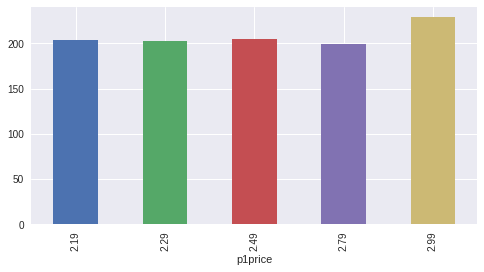

In [90]:
# Graph the counts of each p1price in year 1
# ... this is the data
df_store.loc[df_store.Year==1,:].groupby(['p1price']).size()
# ... plot the pandas object
df_store.loc[df_store.Year==1,:].groupby(['p1price']).size().plot(kind='bar')

### Continuous Variables

In [102]:
df_store.p1sales.min()
df_store.p1sales.max()
df_store.p1sales.mean()
df_store.p1sales.median()
df_store.p1sales.var() # variance
df_store.p1sales.std() # standard deviation
df_store.p1sales.mad()
printmd('all of these could also be done on the full DataFrame...', color='blue')
df_store.min()
# in the .quantile() method below, a series is returned, but the
# row index in pandas can be labels.  So it labels the rows with
# the quantile (i.e. 0.25, 0.5, 0.75).  
# Don't confuse the result below as being a DataFrame with two
# columns -- it is just a single column of numbers with row labels that
# happen to be numbers :-)
printmd('quantile output is a series with row labels', color='blue')
df_store.p1sales.quantile([0.25, 0.5, 0.75])
def IQR(arr):
    q = arr.quantile([0.25, 0.75])
    return q.loc[0.75] - q.loc[0.25] #note that these numbers are index *labels*, not numbers
IQR(df_store.p1sales)
# deciles
df_store.p1sales.quantile([x/10 for x in range(1, 11, 1)])

67.0

273.0

133.19951923076923

130.0

865.1872051559526

29.41406475065887

23.24620007396442

<span style='color:blue'>all of these could also be done on the full DataFrame...</span>

storeNum     101
Year           1
Week           1
p1sales       67
p2sales       65
p1price     2.19
p2price     2.29
p1prom         0
p2prom         0
country       AU
dtype: object

<span style='color:blue'>quantile output is a series with row labels</span>

0.25    112.0
0.50    130.0
0.75    151.0
Name: p1sales, dtype: float64

39.0

0.1     97.0
0.2    108.0
0.3    116.0
0.4    123.0
0.5    130.0
0.6    137.0
0.7    146.0
0.8    157.0
0.9    173.0
1.0    273.0
Name: p1sales, dtype: float64

### Creating tables and changing the index and column labels

In [120]:
# create a summary dataframe showing product1 vs. product2 stats
printmd('Create summary dataframe: Option 1', color='blue')
columns=['Median Sales', 'IQR']
mysummary = pd.DataFrame(data=np.zeros(shape=(2, 2))) # could have specified columns=[] or index=[] here...
mysummary
printmd('....rename(): Now rename the index and column labels', color='blue')
mysummary.rename({0:'p1sales', 1:'p2sales'}, axis='index', inplace=True)  # rename the index labels
mysummary.rename({0:'Median Sales', 1:'IQR'}, axis='columns', inplace=True) # rename the column labels
mysummary
printmd('...finally insert the values', color='blue')
mysummary['Median Sales'] = df_store.loc[:,index].apply(func=np.mean, axis=0)  # because of space in label, us []-style column selector rather than dot.
mysummary.IQR = df_store.loc[:,index].apply(func=IQR, axis=0)
mysummary
printmd('Create summary dataframe: Option 2 (better)', color='red')
index = ['p1sales', 'p2sales']
mysummary = pd.DataFrame({  'Median_Sales': df_store.loc[:,index].apply(func=np.mean, axis=0),
                            'IQR':          df_store.loc[:,index].apply(func=IQR, axis=0)},
                            index=index)
mysummary
printmd('...reindex(): can insert new index and it creates spaces for new ones', color='red')
mysummary.reindex(['p1sales', 'p2sales', 'p3sales']) # since 'inplace' is not specified this create new dataframe, doesn't modify existing one.
printmd('...rename(): or map to new index names using a function instead of a dict-like', color='red')
mysummary.rename(index=str.upper, columns=str.lower)
printmd('...reset_index(): go to default integer row index and original column names...', color='red')
mysummary.reset_index(inplace=True) #go to default integer row index and original column names...
mysummary
printmd('...set_index(): use one of the columns for the row index...', color='red')
mysummary.set_index(keys='index', inplace=True) #the reset_index had created an column named 'index' so we didn't lose that info -- specify it to return these index labels.
mysummary

<span style='color:blue'>Create summary dataframe: Option 1</span>

,0,1
0,0.0,0.0
1,0.0,0.0


<span style='color:blue'>....rename(): Now rename the index and column labels</span>

,Median Sales,IQR
p1sales,0.0,0.0
p2sales,0.0,0.0


<span style='color:blue'>...finally insert the values</span>

,Median Sales,IQR
p1sales,133.199519,39.0
p2sales,121.334135,38.0


<span style='color:red'>Create summary dataframe: Option 2 (better)</span>

,Median_Sales,IQR
p1sales,133.199519,39.0
p2sales,121.334135,38.0


<span style='color:red'>...reindex(): can insert new index and it creates spaces for new ones</span>

,Median_Sales,IQR
p1sales,133.199519,39.0
p2sales,121.334135,38.0
p3sales,NaN,NaN


<span style='color:red'>...rename(): or map to new index names using a function instead of a dict-like</span>

,median_sales,iqr
P1SALES,133.199519,39.0
P2SALES,121.334135,38.0


<span style='color:red'>...reset_index(): go to default integer row index and original column names...</span>

,index,Median_Sales,IQR
0,p1sales,133.199519,39.0
1,p2sales,121.334135,38.0


<span style='color:red'>...set_index(): use one of the columns for the row index...</span>

,Median_Sales,IQR
index,,
p1sales,133.199519,39.0
p2sales,121.334135,38.0


### Single Variable Visualization